[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

# Import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data

In [12]:
df = pd.read_csv("athlete_events.csv")
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
#insight
#medal has a lot of null data

### Don't forget to drop duplicates first

In [4]:
df[df.duplicated()]
#df.drop(columns=["ID"], inplace = True , axis=1)
df1 = df[~df.duplicated()]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     260416 non-null  float64
 4   Height  210917 non-null  float64
 5   Weight  208204 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  int64  
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   39772 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 32.9+ MB


# <font color='red'>**Beginner level**</font>

### Find the missing data in each column

In [5]:
df1.isnull().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

In [6]:
#insight
#missing values in:
#Age         9315
#Height     58814
#Weight     61527
#Medal     229959

In [7]:
# spliting the date to numerical and categorical
df1_numerical = df1.select_dtypes(include = "number")
df1_category = df1.select_dtypes(include = "object")


### Number of males and females

In [8]:
males = df1_category[df1_category["Sex"] == 'M'].count()
females = df1_category[df1_category["Sex"] == 'F'].count()

### How many cities do we have and what are they ?

In [9]:
print(len(df1_category["City"].unique()))
print(df1_category["City"].unique())

42
['Barcelona' 'London' 'Antwerpen' 'Paris' 'Calgary' 'Albertville'
 'Lillehammer' 'Los Angeles' 'Salt Lake City' 'Helsinki' 'Lake Placid'
 'Sydney' 'Atlanta' 'Stockholm' 'Sochi' 'Nagano' 'Torino' 'Beijing'
 'Rio de Janeiro' 'Athina' 'Squaw Valley' 'Innsbruck' 'Sarajevo'
 'Mexico City' 'Munich' 'Seoul' 'Berlin' 'Oslo' "Cortina d'Ampezzo"
 'Melbourne' 'Roma' 'Amsterdam' 'Montreal' 'Moskva' 'Tokyo' 'Vancouver'
 'Grenoble' 'Sapporo' 'Chamonix' 'St. Louis' 'Sankt Moritz'
 'Garmisch-Partenkirchen']


# <font color='red'>**Intermediate level**</fond>

### Find the number of athlete for each year

In [10]:
df1["Year"].value_counts()


Year
1992    16413
1988    14676
2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
2012    12920
1972    11959
1984    11588
1976    10502
1968    10479
1964     9480
1952     9358
1960     9235
1980     8937
1948     7383
1936     7146
1956     6434
1924     5570
1928     5238
2014     4891
2010     4402
2006     4382
1920     4292
2002     4109
1912     4040
1998     3605
1994     3160
1908     3069
1932     2817
1900     1898
1906     1733
1904     1301
1896      380
Name: count, dtype: int64

### Which athlete participated the most? (his/her name and ID)

In [11]:
participation = df1.groupby(['Name','ID']).size().reset_index(name = 'num_participation')
participation
participation.loc[participation['num_participation'].idxmax()].reset_index(name = 'answer')


,index,answer
0,Name,Heikki Ilmari Savolainen
1,ID,106296
2,num_participation,39


# <font color='red'>**Advanced level**</fond>

### Find the number of each medal for each year.
##### The output should look like this 
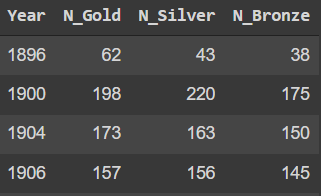

In [297]:
df1[['Year','Medal','ID']].groupby(['Year','Medal']).count()

ID
Year Medal      
1896 Bronze   38
     Gold     62
     Silver   43
1900 Bronze  175
     Gold    198
...          ...
2014 Gold    202
     Silver  197
2016 Bronze  703
     Gold    665
     Silver  655

[105 rows x 1 columns]

# <font color='red'>**You are Geek!**</fond>
### Provide all your answers with plots

### Find the number of winners with the gold medal in each city?

In [305]:
winners = df1[df1['Medal'] == 'Gold'].groupby('City').size().reset_index(name='GoldWinnersCount')
winners

,City,GoldWinnersCount
0,Albertville,104
1,Amsterdam,245
2,Antwerpen,493
3,Athina,883
4,Atlanta,608
5,Barcelona,559
6,Beijing,671
7,Berlin,312
8,Calgary,87
9,Chamonix,55


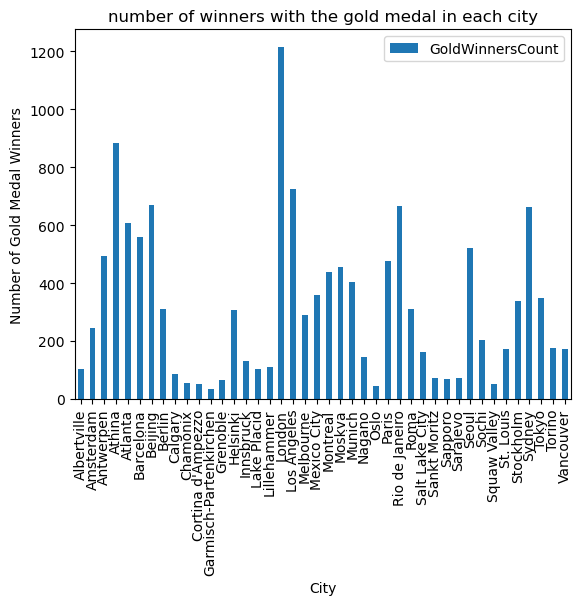

In [312]:
winners.plot(kind='bar', x='City', y='GoldWinnersCount')
plt.title('number of winners with the gold medal in each city')
plt.xlabel('City')
plt.ylabel('Number of Gold Medal Winners')
plt.show()

### Find the total missing data for each year?

Year
1896    False
1900    False
1904    False
1906    False
1908    False
1912    False
1920    False
1924    False
1928    False
1932    False
1936    False
1948    False
1952    False
1956    False
1960    False
1964    False
1968    False
1972    False
1976    False
1980    False
1984    False
1988    False
1992    False
1994    False
1996    False
1998    False
2000    False
2002    False
2004    False
2006    False
2008    False
2010    False
2012    False
2014    False
2016    False
dtype: bool

# <font color='red'>**I dare you to solve this :)**</fond>
### Dont use for loops, and provide all your answers with plots.

### Has the number of athletes changed over time for Summer and Winter?